In [1]:
!pip install qiskit
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=356e0f5d0eed52ef132454e4ca35f6461bd21ff3ab521af714d2c8be8eb1ad01
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.8 MB/s eta 0:00:00


**Installing dependencies**

In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import circuit_drawer, plot_state_city, plot_state_qsphere, plot_bloch_multivector, plot_state_hinton, plot_state_paulivec
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_histogram


**Grover Algorithm**

In [4]:
class grover_algo:
    def __init__(self, n):
        self.n = 3
        self.qc = self.prepare_circuit()
        self.qc1 = self.prepare_circuit1()
        self.simulator = AerSimulator()
        self.result = None


    def prepare_circuit(self):
        qc = QuantumCircuit(self.n,self.n)
        def initialize_s(qc, qubits):
            """Apply a H-gate to 'qubits' in qc"""
            for q in qubits:
                qc.h(q)
            return qc
        qc = initialize_s(qc, [0, 1])  # Fixed `grover_circuit` to `qc`
        qc.cz(0, 1)  # Oracle

        # Diffusion operator (U_s)
        qc.h([0, 1])
        qc.z([0, 1])
        qc.cz(0, 1)
        qc.h([0, 1])

        qc.measure([0, 1], [0, 1])

        return qc

    def prepare_circuit1(self):
        qc1 = QuantumCircuit(self.n,self.n)
        def initialize_s(qc1, qubits):
            """Apply a H-gate to 'qubits' in qc"""
            for q in qubits:
                qc1.h(q)
            return qc1
        qc1 = initialize_s(qc1, [0, 1])  # Fixed `grover_circuit` to `qc`
        qc1.cz(0, 1)  # Oracle

        # Diffusion operator (U_s)
        qc1.h([0, 1])
        qc1.z([0, 1])
        qc1.cz(0, 1)
        qc1.h([0, 1])
        return qc1

    def run_simulation(self, shots=1024):
        transpiled_qc = transpile(self.qc, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def run_simulation1(self, shots=1024):
        transpiled_qc = transpile(self.qc1, self.simulator)
        job = self.simulator.run(transpiled_qc, shots=shots)
        self.result = job.result()

    def get_counts(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return counts
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def plot_result(self):
        if self.result:
            counts = self.result.get_counts(self.qc)
            return plot_histogram(counts)
        else:
            raise RuntimeError("Simulation has not been run yet.")

    def psi(self):
        psi = Statevector(self.qc1)  # Ensure correct method for statevector creation
        return psi

    def get_density(self):
        psi = Statevector(self.qc1)
        return DensityMatrix(psi).draw("latex").data

    def get_city(self):
        psi = Statevector(self.qc1)
        return plot_state_city(psi)

    def get_circuit(self):
        return circuit_drawer(self.qc, output='mpl', filename='circuit.png')

    def get_hinton(self):
        psi = Statevector(self.qc1)
        return plot_state_hinton(psi)

    def get_paulivec(self):
        psi = Statevector(self.qc1)
        return plot_state_paulivec(psi)

    def get_qsphere(self):
        psi = Statevector(self.qc1)
        return plot_state_qsphere(psi)

    def get_bloch(self):
        psi = Statevector(self.qc1)
        return plot_bloch_multivector(psi)

**Running simulation with measurement**

In [5]:
simulator = grover_algo(2)
simulator.run_simulation()

**Counts**

In [6]:
simulator.get_counts()

{'011': 1024}

**Running simuation wihout measurements**

In [7]:
simulator.run_simulation1()

**Density matrix**

In [8]:
from IPython.display import display, Latex
dmatrix=simulator.get_density()
display(Latex(dmatrix))

<IPython.core.display.Latex object>

**Qsphere representation**

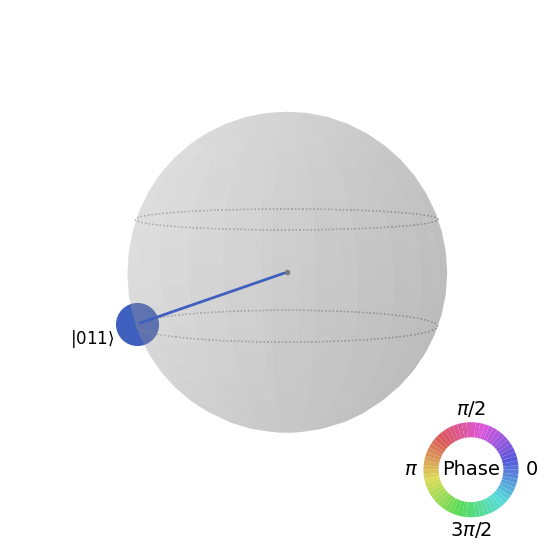

In [9]:
simulator.get_qsphere()

**City Representation**

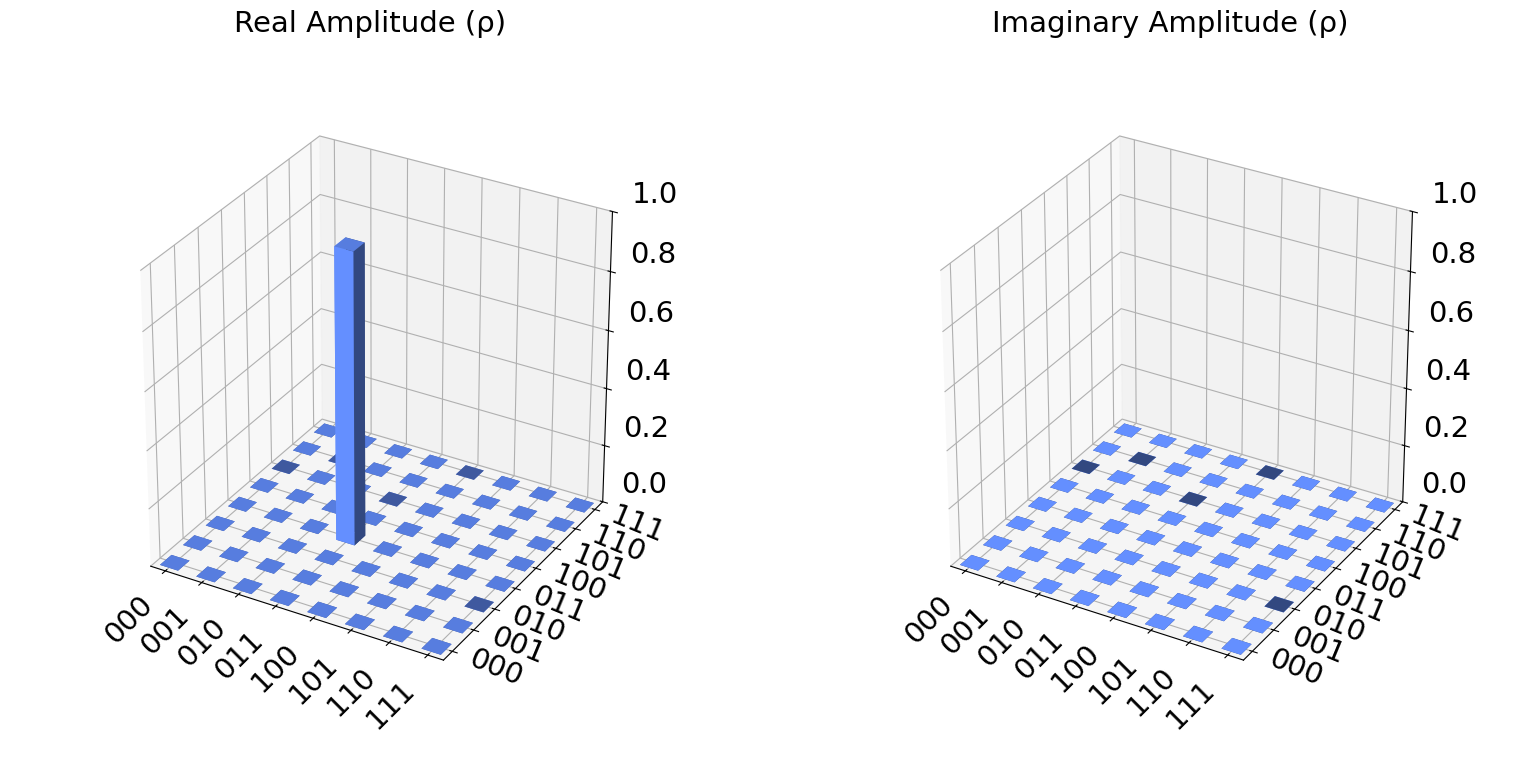

In [10]:
simulator.get_city()

**Circuit Representation**

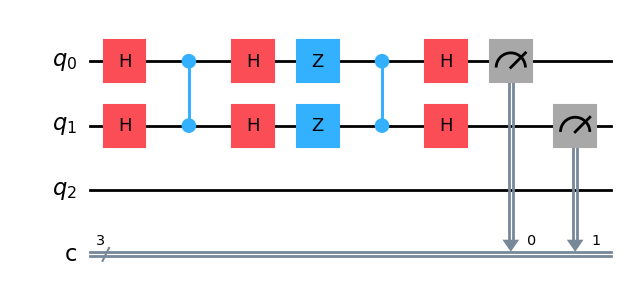

In [11]:
simulator.get_circuit()

**Hinton Representation**

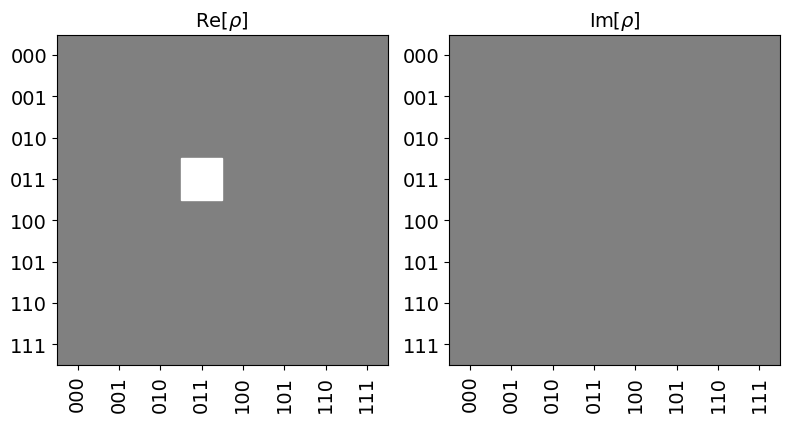

In [12]:
simulator.get_hinton()

**Paulivector Representation**

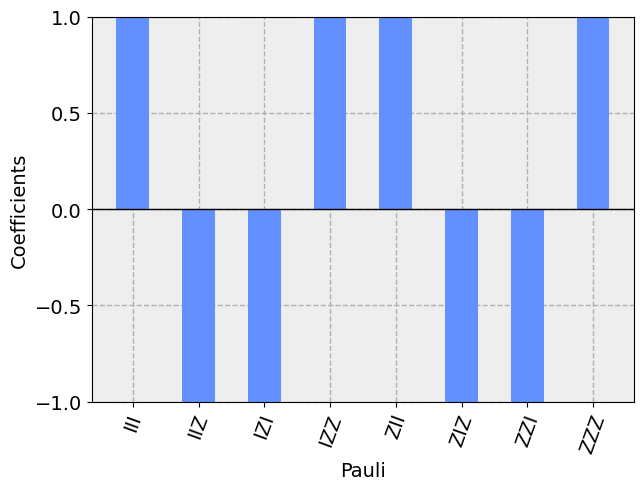

In [13]:
simulator.get_paulivec()

**Bloch sphere Representation**

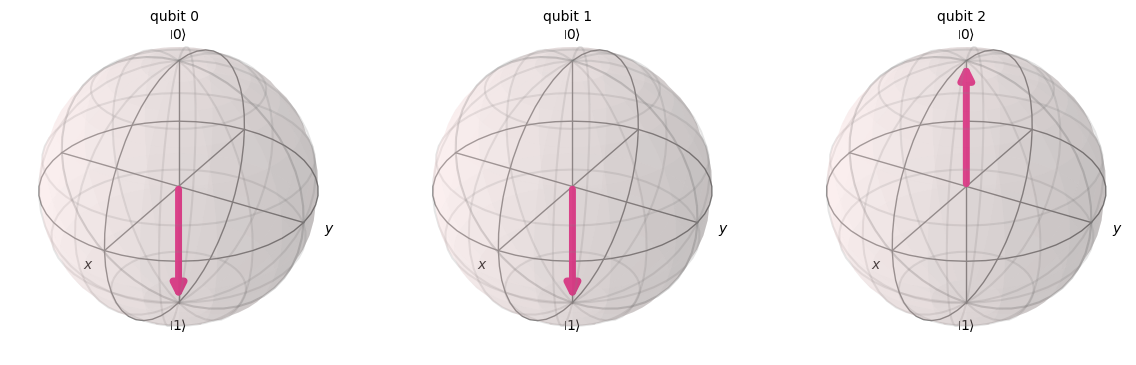

In [14]:
simulator.get_bloch()